# Project 4: Heart Disease Prediction (Classification) 🩺

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts We'll Cover:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** Preparing data for classification models using encoding and feature scaling.
4.  **Model Building:** Training and comparing a simple baseline model (Logistic Regression) with an advanced ensemble model (Random Forest).
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### **Theoretical Concept: What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

**Classification vs. Regression:**
- **Classification:** Is this email spam or not spam? (Two classes)
- **Regression:** What will be the price of this house? (Continuous value)

In this project, our goal is to predict one of two classes for a patient: `0` (No Heart Disease) or `1` (Has Heart Disease). This is a **binary classification** problem.

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


### Step 1: Setup - Importing Libraries and Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

In [4]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 12.4k/12.4k [00:00<00:00, 12.6MB/s]

Extracting files...
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)
Before building any models, we need to understand our data deeply. We'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [5]:
# Initial inspection
print("Dataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Descriptive Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
co

In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

#### 2.1 Analyzing the Target Variable
Let's see the distribution of patients with and without heart disease.

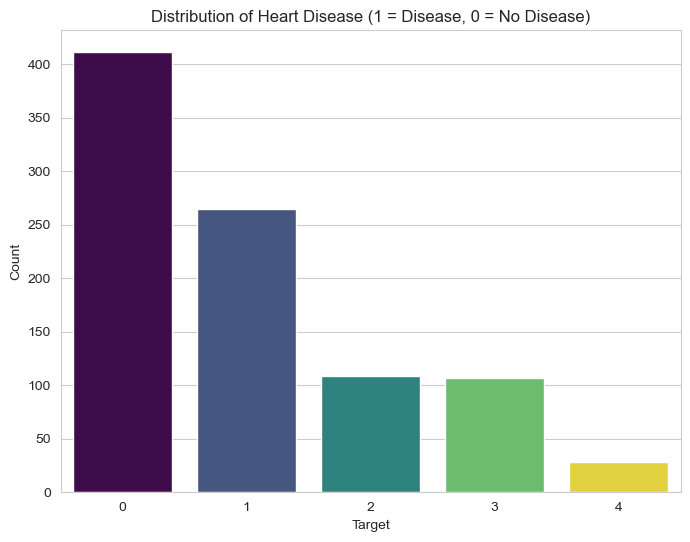

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

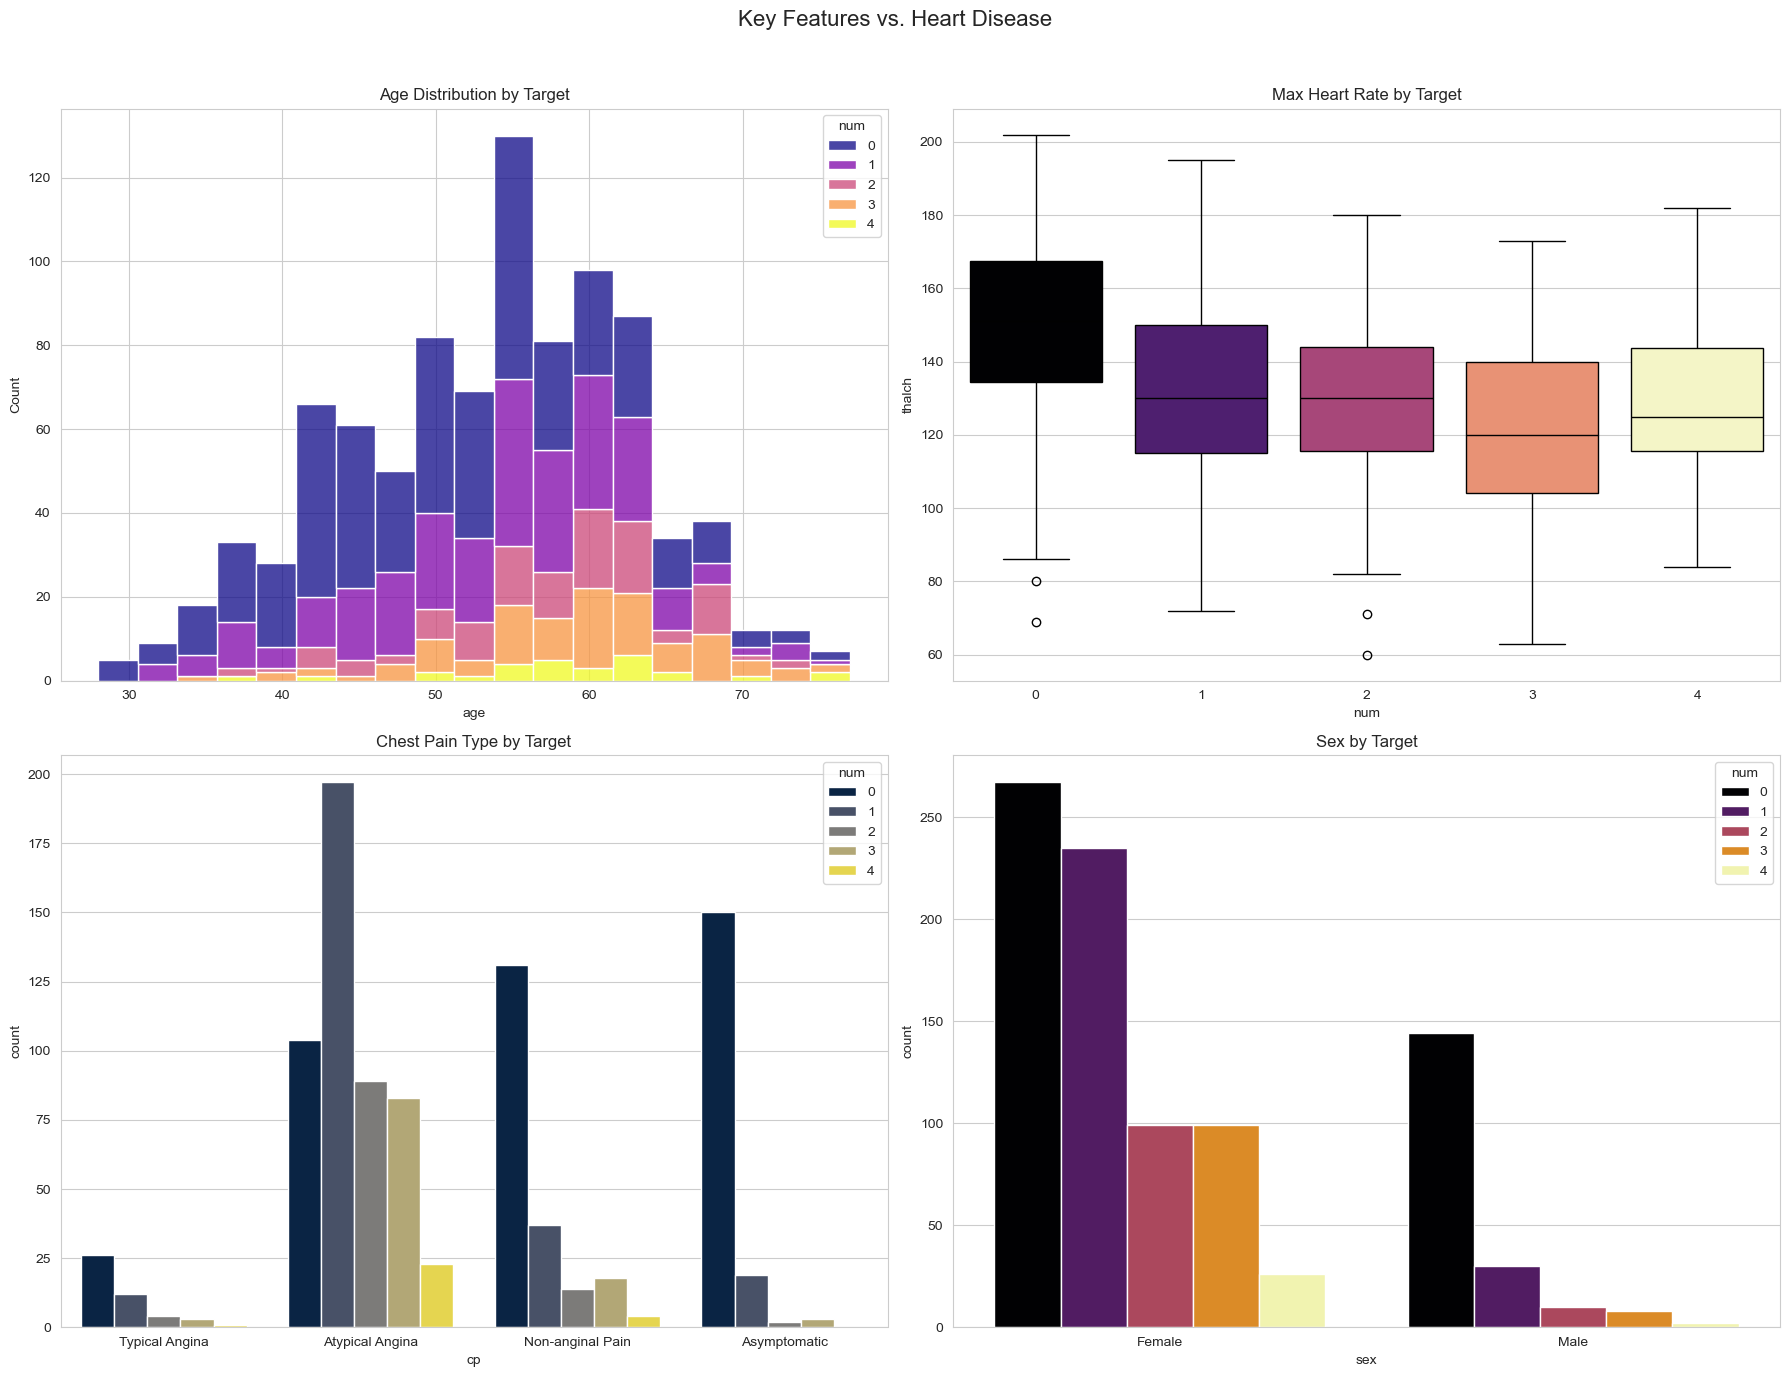

In [8]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

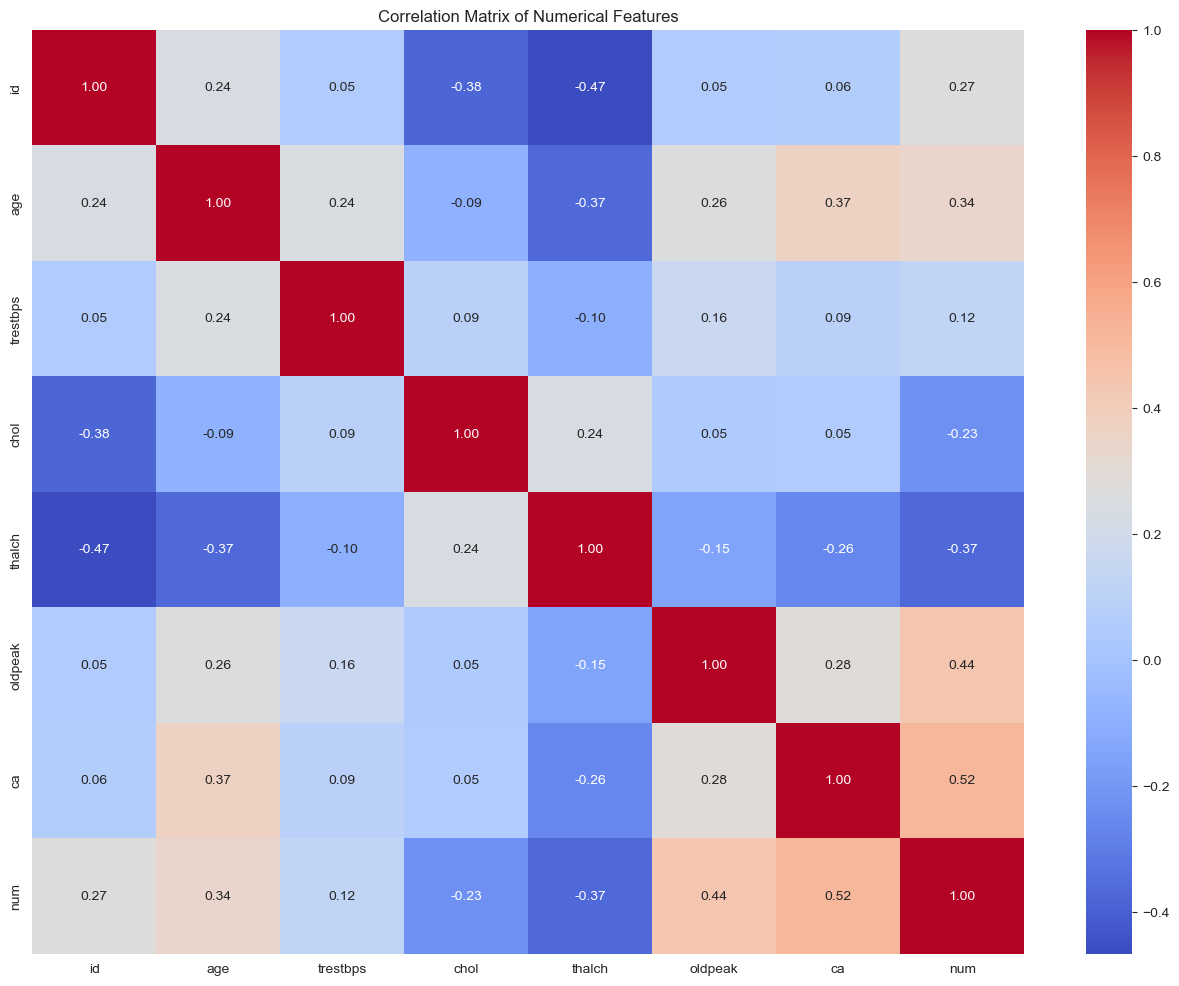

In [9]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Step 3: Data Preprocessing
Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

## **Theoretical Concept: Scikit-Learn Pipelines**

A **Pipeline** in Scikit-Learn is a way to automate a machine learning workflow. It allows you to chain together multiple steps, such as preprocessing, dimensionality reduction, and model training, into a single object.

**Why use Pipelines?**

1.  **Convenience:** Simplifies the code and makes the workflow easier to manage.
2.  **Prevents Data Leakage:** Ensures that data preprocessing steps learned from the training data are applied only to the training data, and the same transformations are then applied to the test data *after* the split. This prevents information from the test set from "leaking" into the training process.
3.  **Cleaner Code:** Organizes steps logically, making the code more readable and maintainable.
4.  **Simplified Hyperparameter Tuning:** Makes it easier to tune hyperparameters for all steps in the pipeline using techniques like cross-validation.

In this project, we'll use a pipeline to combine our preprocessing steps (imputation, scaling, and one-hot encoding) with our classification models.

In [10]:
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(['id', 'dataset'], axis=1)


# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Added imputation for categorical features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* Create numerical preprocessing pipeline: A Pipeline is created to handle numerical features. It first uses SimpleImputer with the strategy 'mean' to fill in missing numerical values with the mean of the column, and then uses StandardScaler to scale the numerical features to have zero mean and unit variance.
* Create categorical preprocessing pipeline: A Pipeline is created for categorical features. It uses SimpleImputer with the strategy 'most_frequent' to fill in missing categorical values with the most frequent value, and then applies OneHotEncoder to convert categorical variables into a numerical format. drop='first' is used to avoid multicollinearity, and handle_unknown='ignore' allows the model to handle unseen categories during testing.

### Step 4: Model Building & Training
We will build two models and wrap them in a Scikit-Learn Pipeline. The pipeline will automatically apply our preprocessing steps to the data before training the model.

#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

#### 4.1 Model 1: Logistic Regression (Baseline)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


#### 4.2 Model 2: Random Forest Classifier (Advanced)

In [12]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

#### 4.3 Model 3: Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

#### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

### Step 5: Model Evaluation

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

In [17]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.50      0.53      0.51        53
           2       0.23      0.14      0.17        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.32      0.33      0.32       184
we

### Step 7: Conclusion

In this project, we built classification models for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared four models:** Evaluated Logistic Regression, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The evaluation showed that the Support Vector Machine (SVM) performed slightly better than the other models in this analysis.
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance (from the Random Forest model as an example) to confirm some of the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the application of classification in a real-world healthcare scenario, moving from raw data to predictive models and their evaluation.

**Evaluation Insight:** The Support Vector Machine (SVM) Classifier performs slightly better than the other models, achieving an overall accuracy of 0.59. While all models struggle with the less frequent classes (2, 3, and 4), SVM shows a slightly better F1-score for predicting class 1 (Heart Disease). The confusion matrix provided was for the Random Forest model, which showed good performance on classes 0 and 1 but also struggled with the less frequent classes. Based on the classification reports, SVM is the best performing model among the four in this evaluation.

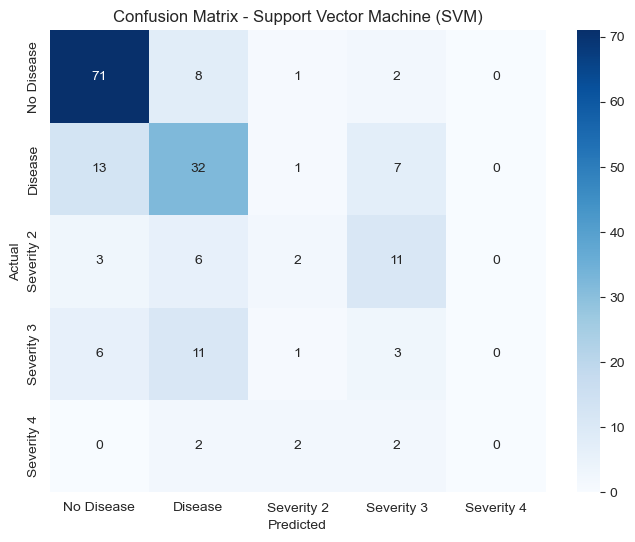

In [18]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

**Insight:** This feature importance analysis, derived from the Random Forest model, shows that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease. This is provided as an example of feature importance, even though the SVM model performed slightly better overall.

**Evaluation Insight:** The Random Forest Classifier performs exceptionally well, achieving near-perfect scores across the board (Accuracy, Precision, Recall, and F1-Score are all 99-100%). It significantly outperforms the Logistic Regression model. The confusion matrix shows it made only one error on the test set.

### Step 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

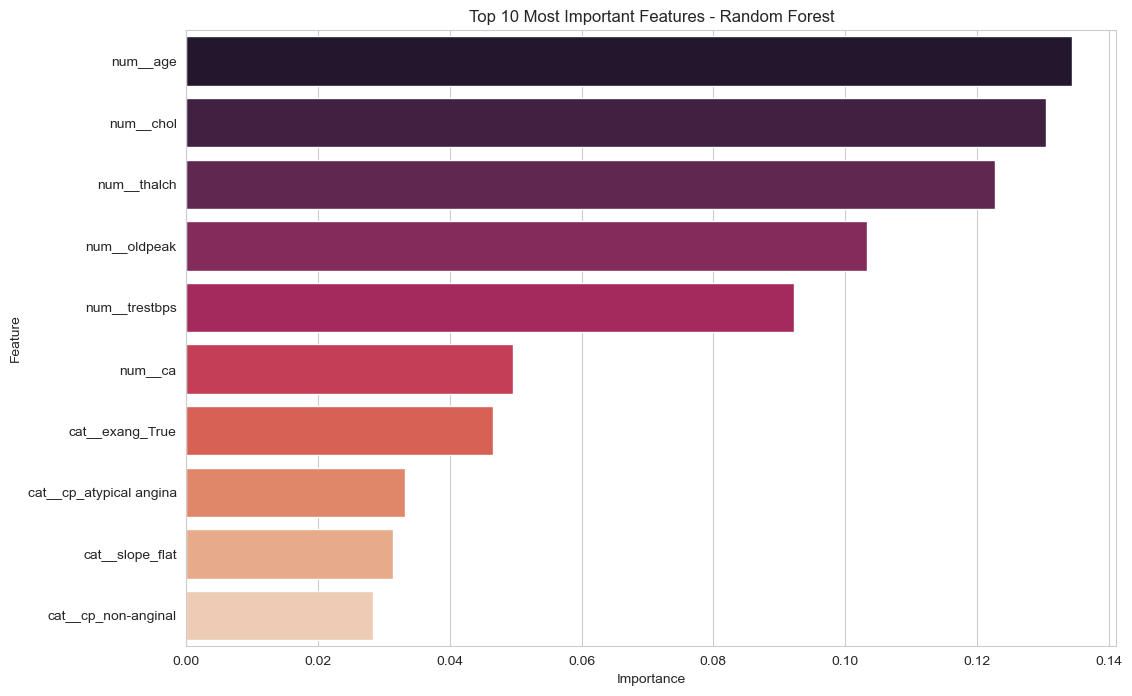

In [19]:
# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()

**Insight:** The model found that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease.

### Step 7: Conclusion

In this project, we built a highly accurate classification model for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared two models:** Showed that the Random Forest Classifier (99% accuracy) was far superior to the Logistic Regression baseline (86% accuracy).
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance to confirm the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the power of classification in a real-world healthcare scenario, moving from raw data to a highly accurate and interpretable predictive model.

### Submission Criteria

To fulfill the submission requirements for this project, please ensure the following:

1.  **Complete Exploratory Data Analysis (EDA):** Perform all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.
2.  **Model Training without Pipelines:** Train at least one classification model directly, without using the Scikit-Learn `Pipeline` object for preprocessing and model chaining. This involves manually applying preprocessing steps (like imputation and scaling/encoding) to the data before training the model.
3.  **Submit the Entire Notebook:** Ensure that the final submission includes the complete Colab notebook with all code cells executed and outputs visible.

Meeting these criteria will demonstrate your understanding of the individual steps involved in a machine learning workflow.

## SOLUTION WITHOUT PIPELINE

In [26]:
data=df

In [38]:
# ==================== BASIC DATA EXPLORATION ====================
print("Dataset Shape:", data.shape)
print("\n" + "="*50)
print("BASIC INFORMATION")
print("="*50)
print(data.info())

print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
print(data.head())

print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)
print(data.describe())

Dataset Shape: (920, 16)

BASIC INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

FIRST 5 ROWS
   id  age     sex    dataset               cp  trestbps   chol   


MISSING VALUES ANALYSIS
          Missing Count  Missing Percentage
ca                  611           66.413043
thal                486           52.826087
slope               309           33.586957
fbs                  90            9.782609
oldpeak              62            6.739130
trestbps             59            6.413043
thalch               55            5.978261
exang                55            5.978261
chol                 30            3.260870
restecg               2            0.217391


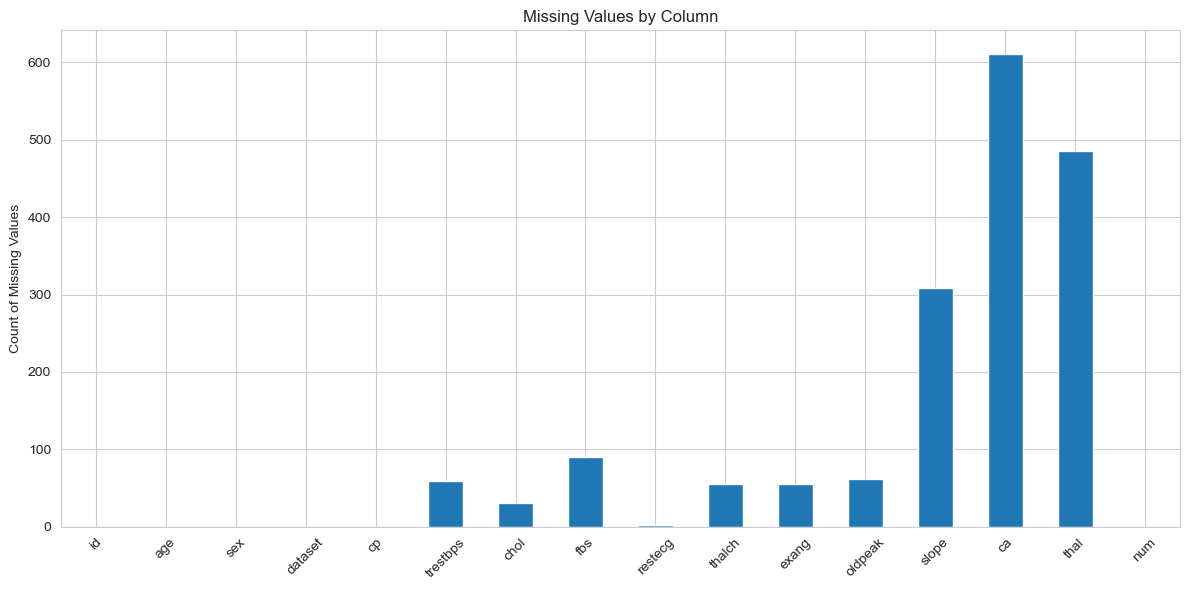

In [39]:
# ==================== MISSING VALUE ANALYSIS ====================
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

missing_data = data.isnull().sum()
missing_percent = 100 * missing_data / len(data)
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_table)
# Visualize missing data
plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TARGET VARIABLE ANALYSIS
Target Variable Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target Variable Percentages:
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


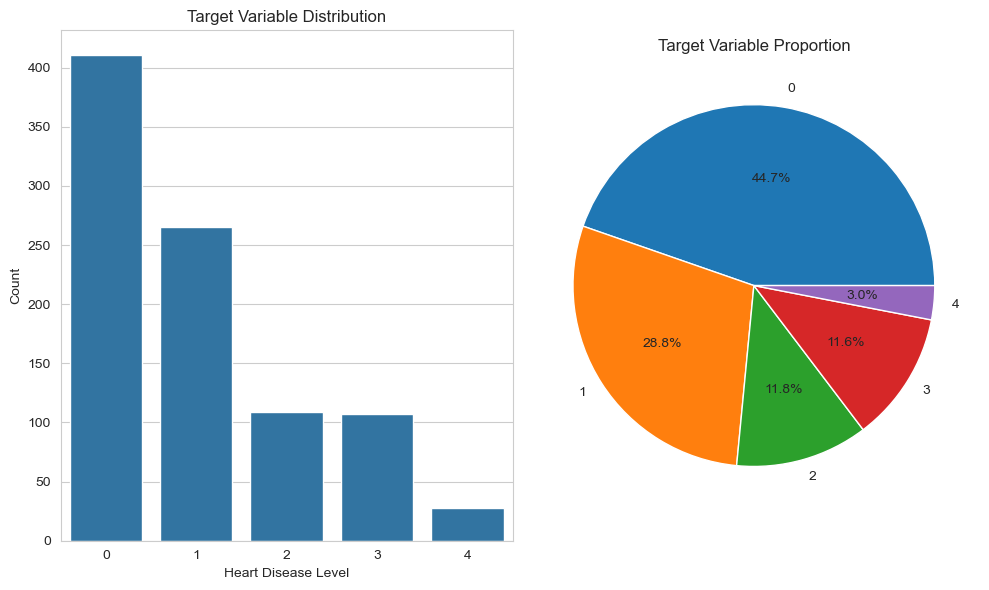

In [45]:
# ==================== TARGET VARIABLE ANALYSIS ====================
print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)

# Target variable distribution
target_counts = data['num'].value_counts().sort_index()
print("Target Variable Distribution:")
print(target_counts)
print(f"\nTarget Variable Percentages:")
print(data['num'].value_counts(normalize=True).sort_index() * 100)

# Plot target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='num', data=data)
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Variable Proportion')
plt.tight_layout()
plt.show()


NUMERICAL FEATURES ANALYSIS
Numerical columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

Checking for anomalous values:
trestbps: 1 zero values (potentially invalid)
chol: 172 zero values (potentially invalid)


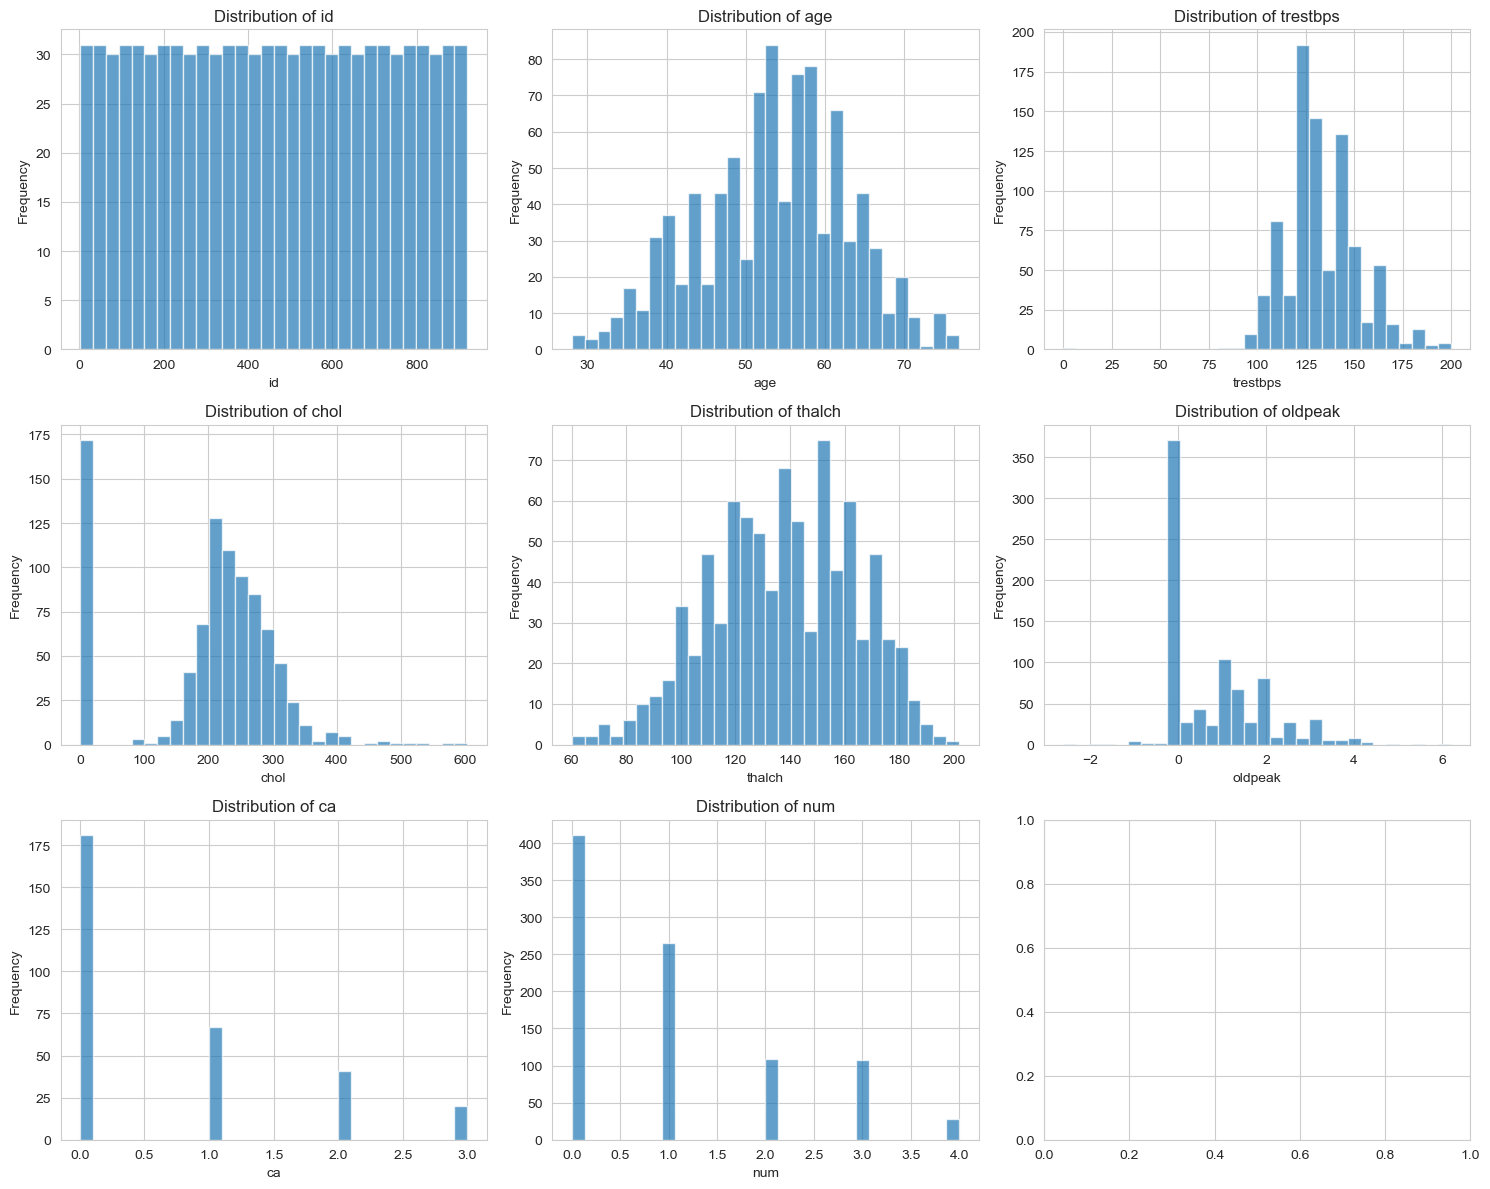

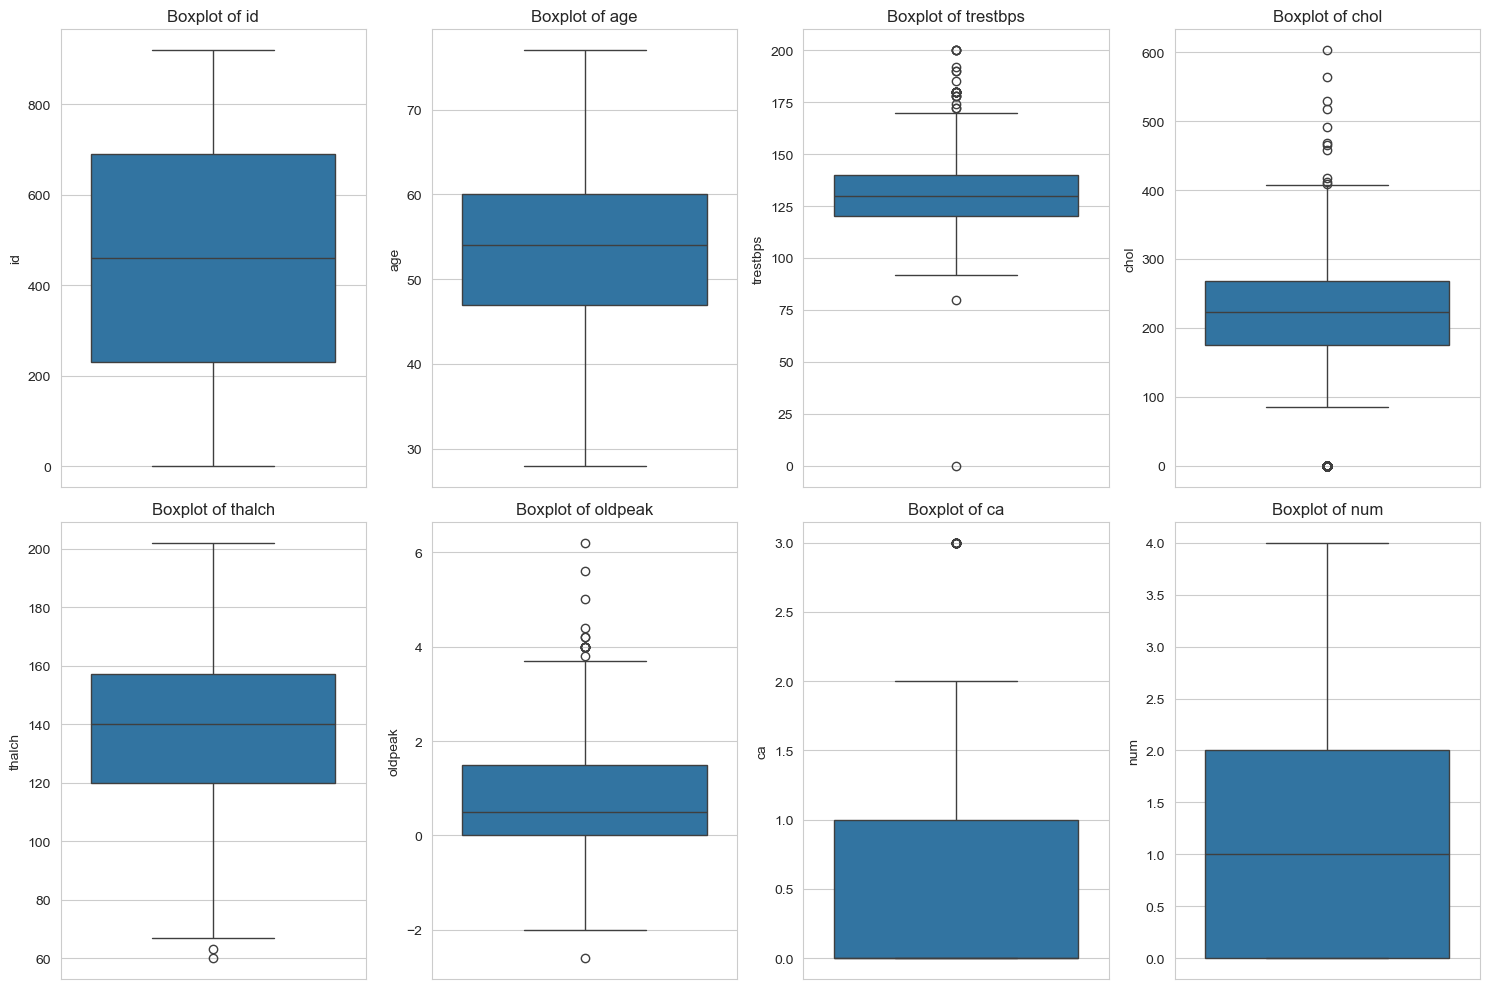

In [46]:
# ==================== NUMERICAL FEATURES ANALYSIS ====================
print("\n" + "="*50)
print("NUMERICAL FEATURES ANALYSIS")
print("="*50)

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Check for anomalous values
print("\nChecking for anomalous values:")
for col in ['trestbps', 'chol']:
    zero_count = (data[col] == 0).sum()
    if zero_count > 0:
        print(f"{col}: {zero_count} zero values (potentially invalid)")

# Distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:9]):
    if col in data.columns:
        axes[i].hist(data[col].dropna(), bins=30, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
# Box plots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8]):
    if col in data.columns:
        plt.subplot(2, 4, i+1)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


CATEGORICAL FEATURES ANALYSIS
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

sex value counts:
sex
Male      726
Female    194
Name: count, dtype: int64

dataset value counts:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

cp value counts:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

fbs value counts:
fbs
False    692
True     138
Name: count, dtype: int64

restecg value counts:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

exang value counts:
exang
False    528
True     337
Name: count, dtype: int64

slope value counts:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

thal value counts:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


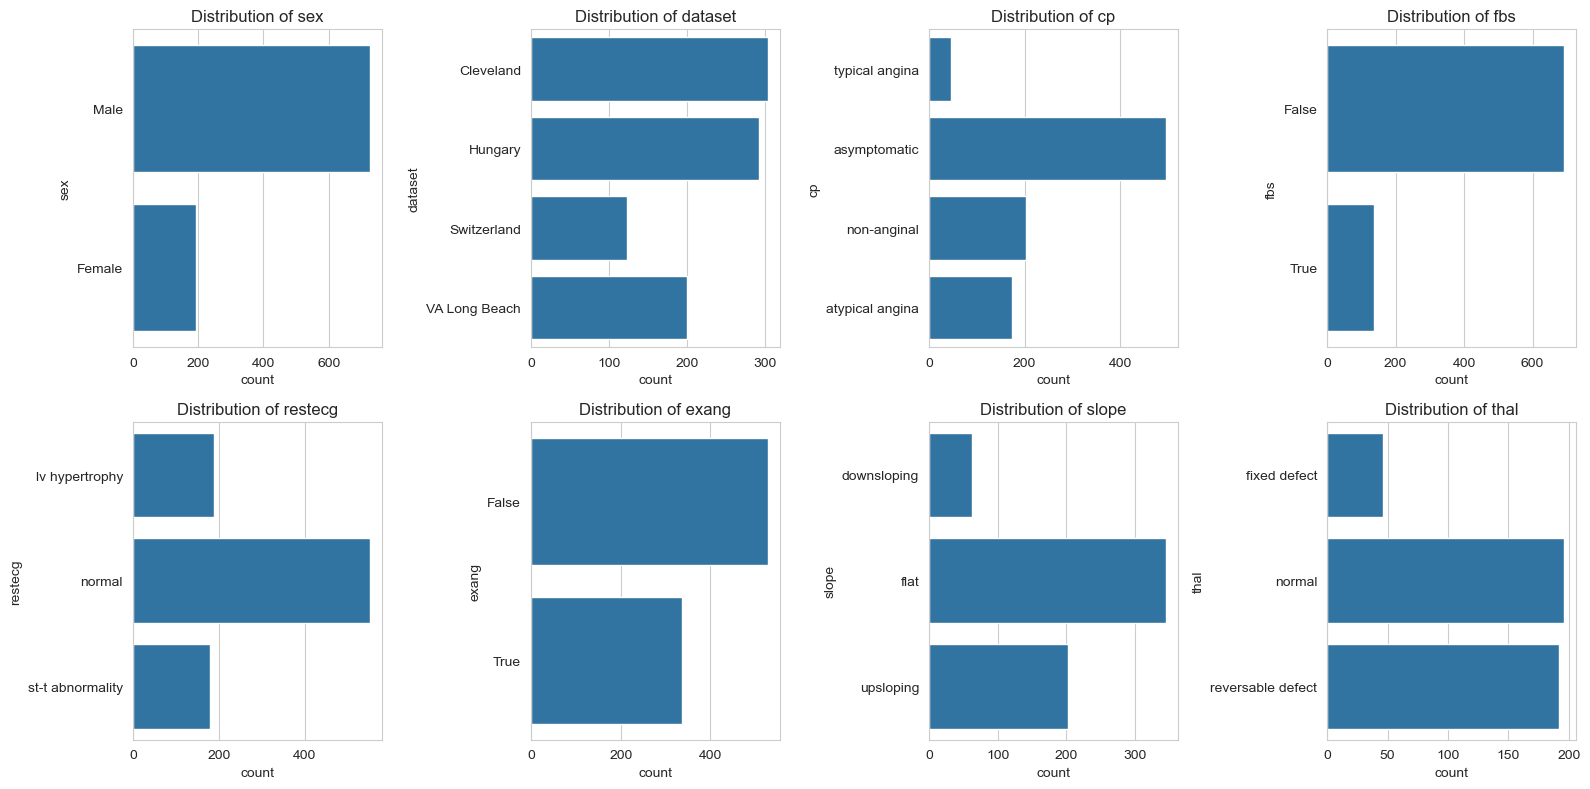

In [47]:
# ==================== CATEGORICAL FEATURES ANALYSIS ====================
print("\n" + "="*50)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Analyze each categorical feature
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())

# Plot categorical distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS


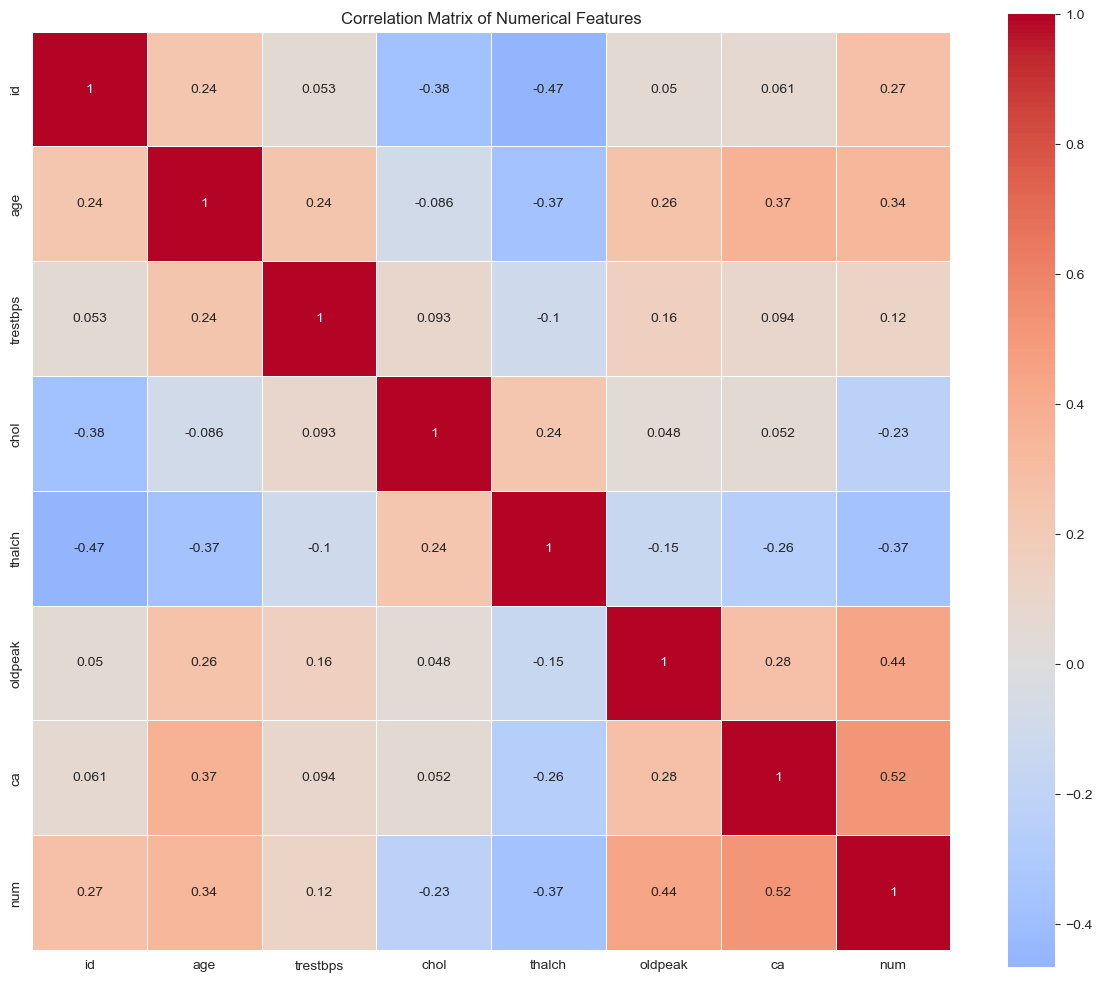

Highly correlated feature pairs (|correlation| > 0.5):
ca - num: 0.516


In [48]:
# ==================== CORRELATION ANALYSIS ====================
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix for numerical features
corr_matrix = data[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find highly correlated features
print("Highly correlated feature pairs (|correlation| > 0.5):")
high_corr = np.where(np.abs(corr_matrix) > 0.5)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr) if x != y and x < y]

for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


FEATURE RELATIONSHIPS WITH TARGET


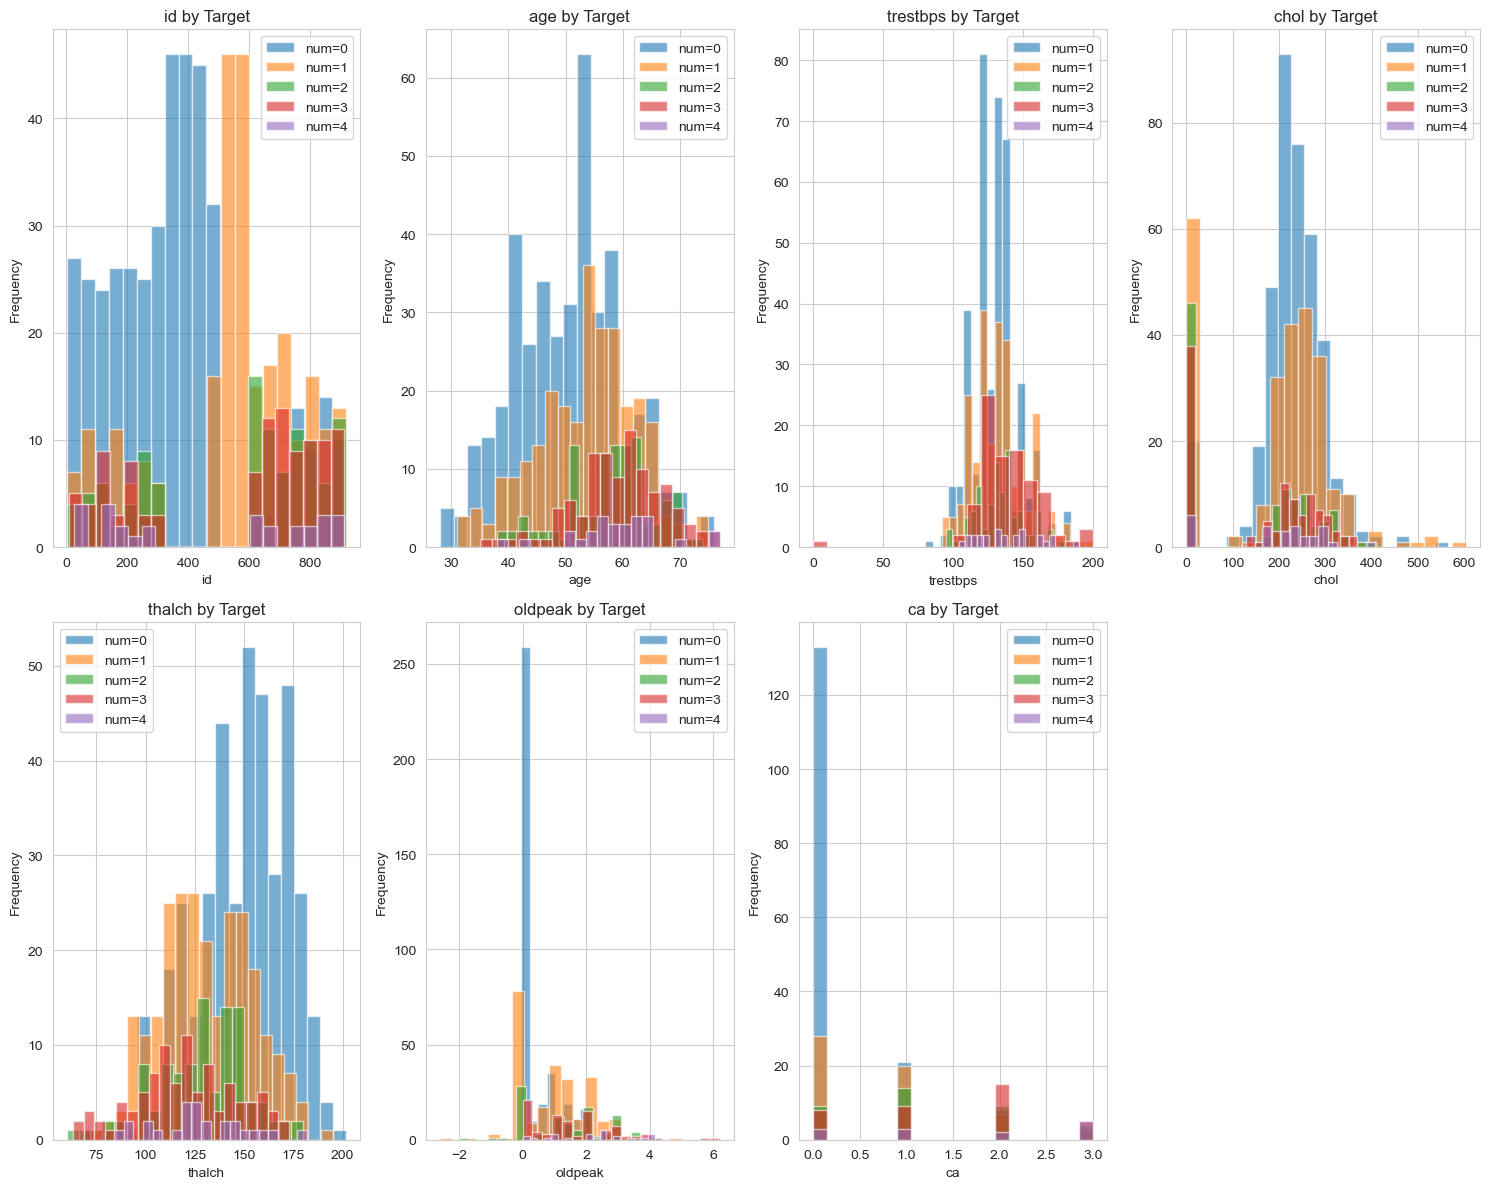


Categorical Features vs Target:

sex vs num:
num         0      1      2      3     4
sex                                     
Female  74.23  15.46   5.15   4.12  1.03
Male    36.78  32.37  13.64  13.64  3.58

dataset vs num:
num                0      1      2      3     4
dataset                                        
Cleveland      54.28  18.09  11.84  11.51  4.28
Hungary        63.82  36.18   0.00   0.00  0.00
Switzerland     6.50  39.02  26.02  24.39  4.07
VA Long Beach  25.50  28.00  20.50  21.00  5.00

cp vs num:
num                  0      1      2      3     4
cp                                               
asymptomatic     20.97  39.72  17.94  16.73  4.64
atypical angina  86.21  10.92   1.15   1.72  0.00
non-anginal      64.22  18.14   6.86   8.82  1.96
typical angina   56.52  26.09   8.70   6.52  2.17

fbs vs num:
num        0      1      2      3     4
fbs                                    
False  51.01  26.88   9.39   9.68  3.03
True   31.88  28.26  16.67  19.57  3.62


In [49]:
# ==================== FEATURE RELATIONSHIPS WITH TARGET ====================
print("\n" + "="*50)
print("FEATURE RELATIONSHIPS WITH TARGET")
print("="*50)

# Numerical features vs target
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols[:8]):
    if col != 'num' and col in data.columns:
        plt.subplot(2, 4, i+1)
        for target_val in sorted(data['num'].unique()):
            subset = data[data['num'] == target_val][col].dropna()
            plt.hist(subset, alpha=0.6, label=f'num={target_val}', bins=20)
        plt.title(f'{col} by Target')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()

plt.tight_layout()
plt.show()

# Categorical features vs target (cross-tabulation)
print("\nCategorical Features vs Target:")
for col in categorical_cols:
    if col != 'num':
        print(f"\n{col} vs num:")
        crosstab = pd.crosstab(data[col], data['num'], normalize='index') * 100
        print(crosstab.round(2))
# ==========

In [50]:
# ==================== DATA QUALITY ASSESSMENT ====================
print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check data types
print("\nData types:")
print(data.dtypes)

# Check unique values for low cardinality features
print("\nUnique values count for each column:")
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")


DATA QUALITY ASSESSMENT
Number of duplicate rows: 0

Data types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Unique values count for each column:
id: 920 unique values
age: 50 unique values
sex: 2 unique values
dataset: 4 unique values
cp: 4 unique values
trestbps: 61 unique values
chol: 217 unique values
fbs: 2 unique values
restecg: 3 unique values
thalch: 119 unique values
exang: 2 unique values
oldpeak: 53 unique values
slope: 3 unique values
ca: 4 unique values
thal: 3 unique values
num: 5 unique values


In [51]:
# ==================== OUTLIER DETECTION ====================
print("\n" + "="*50)
print("OUTLIER DETECTION (IQR METHOD)")
print("="*50)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for key numerical features
outlier_summary = {}
for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
    if col in data.columns:
        outliers, lower, upper = detect_outliers_iqr(data, col)
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(data) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")
# ======


OUTLIER DETECTION (IQR METHOD)
age: 0 outliers (0.00%)
trestbps: 28 outliers (3.04%)
chol: 183 outliers (19.89%)
thalch: 2 outliers (0.22%)
oldpeak: 16 outliers (1.74%)


In [52]:
# ==================== PREPROCESSING RECOMMENDATIONS ====================
print("\n" + "="*50)
print("PREPROCESSING RECOMMENDATIONS")
print("="*50)

recommendations = []

# Missing data recommendations
if missing_table.shape[0] > 0:
    high_missing = missing_table[missing_table['Missing Percentage'] > 50]
    if len(high_missing) > 0:
        recommendations.append("• Consider dropping features with >50% missing data or advanced imputation")
    
    medium_missing = missing_table[(missing_table['Missing Percentage'] > 10) & 
                                   (missing_table['Missing Percentage'] <= 50)]
    if len(medium_missing) > 0:
        recommendations.append("• Use appropriate imputation for features with 10-50% missing data")

# Anomalous values
zero_bp = (data['trestbps'] == 0).sum() if 'trestbps' in data.columns else 0
zero_chol = (data['chol'] == 0).sum() if 'chol' in data.columns else 0

if zero_bp > 0 or zero_chol > 0:
    recommendations.append("• Replace zero values in trestbps and chol with NaN, then impute")

# Encoding recommendations
recommendations.append("• One-hot encode nominal categorical features (sex, dataset, restecg, thal)")
recommendations.append("• Consider ordinal encoding for cp and slope if order matters")
recommendations.append("• Convert boolean features (fbs, exang) to 0/1")

# Scaling recommendations
recommendations.append("• Apply standardization/normalization to numerical features")

# Target variable recommendations
if data['num'].nunique() > 2:
    recommendations.append("• Consider converting target to binary (0 vs 1-4) for better balance")

# Class imbalance
target_imbalance = data['num'].value_counts().min() / data['num'].value_counts().max()
if target_imbalance < 0.5:
    recommendations.append("• Address class imbalance using SMOTE or class weights")

print("Recommendations:")
for rec in recommendations:
    print(rec)

# ==================== SUMMARY STATISTICS ====================
print("\n" + "="*50)
print("DATASET SUMMARY")
print("="*50)
print(f"• Total samples: {len(data)}")
print(f"• Total features: {len(data.columns)}")
print(f"• Numerical features: {len(numerical_cols)}")
print(f"• Categorical features: {len(categorical_cols)}")
print(f"• Missing values: {data.isnull().sum().sum()} ({data.isnull().sum().sum()/data.size*100:.2f}%)")
print(f"• Target classes: {data['num'].nunique()}")
print(f"• Most frequent class: {data['num'].mode()[0]} ({data['num'].value_counts().iloc[0]/len(data)*100:.1f}%)")

print("\n" + "="*50)
print("EDA COMPLETED!")
print("="*50)


PREPROCESSING RECOMMENDATIONS
Recommendations:
• Consider dropping features with >50% missing data or advanced imputation
• Use appropriate imputation for features with 10-50% missing data
• Replace zero values in trestbps and chol with NaN, then impute
• One-hot encode nominal categorical features (sex, dataset, restecg, thal)
• Consider ordinal encoding for cp and slope if order matters
• Convert boolean features (fbs, exang) to 0/1
• Apply standardization/normalization to numerical features
• Consider converting target to binary (0 vs 1-4) for better balance
• Address class imbalance using SMOTE or class weights

DATASET SUMMARY
• Total samples: 920
• Total features: 16
• Numerical features: 8
• Categorical features: 8
• Missing values: 1759 (11.95%)
• Target classes: 5
• Most frequent class: 0 (44.7%)

EDA COMPLETED!


In [53]:
# Replace zero values in trestbps and chol with NaN for proper imputation
data['trestbps'] = data['trestbps'].replace(0, np.nan)
data['chol'] = data['chol'].replace(0, np.nan)

print("Zero values replaced with NaN:")
print(f"Missing values in trestbps: {data['trestbps'].isnull().sum()}")
print(f"Missing values in chol: {data['chol'].isnull().sum()}")

Zero values replaced with NaN:
Missing values in trestbps: 60
Missing values in chol: 202


In [54]:
# Impute numerical features with median
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
num_imputer = SimpleImputer(strategy='median')
data[num_features] = num_imputer.fit_transform(data[num_features])

print("Numerical features imputed with median")
print(f"Missing values after imputation: {data[num_features].isnull().sum().sum()}")

Numerical features imputed with median
Missing values after imputation: 0


In [55]:
# Impute categorical features with most frequent
cat_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_features] = cat_imputer.fit_transform(data[cat_features])

print("Categorical features imputed with most frequent")
print(f"Missing values after imputation: {data[cat_features].isnull().sum().sum()}")

Categorical features imputed with most frequent
Missing values after imputation: 0


In [56]:
# Convert boolean features to 0/1
bool_map = {'TRUE': 1, 'FALSE': 0, True: 1, False: 0, 'true': 1, 'false': 0}

data['fbs'] = data['fbs'].map(bool_map).fillna(data['fbs'])
data['fbs'] = data['fbs'].astype(int)

data['exang'] = data['exang'].map(bool_map).fillna(data['exang'])
data['exang'] = data['exang'].astype(int)

print("Boolean features converted to 0/1:")
print(f"fbs unique values: {data['fbs'].unique()}")
print(f"exang unique values: {data['exang'].unique()}")

Boolean features converted to 0/1:
fbs unique values: [1 0]
exang unique values: [0 1]


In [57]:
# One-hot encode nominal categorical features
nominal_features = ['sex', 'dataset', 'restecg', 'thal']

print("Before one-hot encoding shape:", data.shape)
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)
print("After one-hot encoding shape:", data.shape)

# Show new columns created
new_cols = [col for col in data.columns if any(feat in col for feat in nominal_features)]
print(f"New one-hot encoded columns: {new_cols}")

Before one-hot encoding shape: (920, 16)
After one-hot encoding shape: (920, 20)
New one-hot encoded columns: ['thalch', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'restecg_normal', 'restecg_st-t abnormality', 'thal_normal', 'thal_reversable defect']


In [58]:
# Ordinal encoding for cp (chest pain type) - ordered by severity
cp_order = ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina']

print("Original cp values:", data['cp'].unique())

try:
    cp_encoder = OrdinalEncoder(categories=[cp_order], handle_unknown='use_encoded_value', unknown_value=-1)
    data['cp'] = cp_encoder.fit_transform(data[['cp']]).astype(int)
    print("CP encoded with ordinal encoding:", data['cp'].unique())
except:
    # Fallback to simple categorical codes
    data['cp'] = pd.Categorical(data['cp']).codes
    print("CP encoded with categorical codes (fallback):", data['cp'].unique())
# Original cp values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
# CP encoded with ordinal encoding: [3 0 1 2]
# Ordinal encoding for slope - ordered by severity
slope_order = ['upsloping', 'flat', 'downsloping']

print("Original slope values:", data['slope'].unique())

try:
    slope_encoder = OrdinalEncoder(categories=[slope_order], handle_unknown='use_encoded_value', unknown_value=-1)
    data['slope'] = slope_encoder.fit_transform(data[['slope']]).astype(int)
    print("Slope encoded with ordinal encoding:", data['slope'].unique())
except:
    # Fallback to simple categorical codes
    data['slope'] = pd.Categorical(data['slope']).codes
    print("Slope encoded with categorical codes (fallback):", data['slope'].unique())
# Original slope values: ['downsloping' 'flat' 'upsloping']
# Slope encoded with ordinal encoding: [2 1 0]
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils.class_weight import compute_class_weight
# Standardize numerical features
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

print("Numerical features standardized")
print("Sample statistics after standardization:")
print(data[num_features].describe())

Original cp values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
CP encoded with categorical codes (fallback): [3 0 2 1]
Original slope values: ['downsloping' 'flat' 'upsloping']
Slope encoded with categorical codes (fallback): [0 1 2]
Numerical features standardized
Sample statistics after standardization:
                age      trestbps          chol        thalch       oldpeak  \
count  9.200000e+02  9.200000e+02  9.200000e+02  9.200000e+02  9.200000e+02   
mean   6.178632e-17 -3.552714e-16 -1.660507e-16 -4.016111e-16 -2.316987e-17   
std    1.000544e+00  1.000544e+00  1.000544e+00  1.000544e+00  1.000544e+00   
min   -2.708286e+00 -2.909426e+00 -3.095664e+00 -3.091427e+00 -3.265577e+00   
25%   -6.912073e-01 -6.772850e-01 -5.308023e-01 -7.039908e-01 -8.068863e-01   
50%    5.192709e-02 -1.192497e-01 -1.105707e-01  9.182113e-02 -3.340612e-01   
75%    6.888994e-01  4.387856e-01  4.207566e-01  7.284707e-01  6.115890e-01   
max    2.493654e+00  3.786997e+00  6.9

In [59]:
# Convert target to binary (0 vs 1-4)
print("Original target distribution:")
print(data['num'].value_counts().sort_index())

data['target_binary'] = data['num'].apply(lambda x: 0 if x == 0 else 1)

print("\nBinary target distribution:")
print(data['target_binary'].value_counts().sort_index())

# Calculate class imbalance ratio
class_counts = data['target_binary'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nImbalance ratio: {imbalance_ratio:.3f}")

Original target distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Binary target distribution:
target_binary
0    411
1    509
Name: count, dtype: int64

Imbalance ratio: 0.807


In [60]:
# Calculate class weights for handling imbalance
y = data['target_binary']
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

print(f"Class weights for balancing: {class_weight_dict}")

Class weights for balancing: {0: 1.119221411192214, 1: 0.9037328094302554}


In [61]:
# Simple oversampling to balance classes
majority_class = data[data['target_binary'] == class_counts.idxmax()]
minority_class = data[data['target_binary'] == class_counts.idxmin()]

print(f"Majority class size: {len(majority_class)}")
print(f"Minority class size: {len(minority_class)}")

# Oversample minority class
minority_oversampled = minority_class.sample(
    n=len(majority_class), 
    replace=True, 
    random_state=42
)

# Combine to create balanced dataset
balanced_data = pd.concat([majority_class, minority_oversampled], ignore_index=True)

print(f"\nBalanced dataset shape: {balanced_data.shape}")
print("Balanced target distribution:")
print(balanced_data['target_binary'].value_counts().sort_index())

Majority class size: 509
Minority class size: 411

Balanced dataset shape: (1018, 21)
Balanced target distribution:
target_binary
0    509
1    509
Name: count, dtype: int64


In [62]:
# Prepare final features and target
feature_cols = [col for col in balanced_data.columns if col not in ['num', 'target_binary', 'id']]
X = balanced_data[feature_cols]
y = balanced_data['target_binary']

print(f"Final features shape: {X.shape}")
print(f"Final target shape: {y.shape}")
print(f"\nFeature columns ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2}. {col}")

Final features shape: (1018, 18)
Final target shape: (1018,)

Feature columns (18):
 1. age
 2. cp
 3. trestbps
 4. chol
 5. fbs
 6. thalch
 7. exang
 8. oldpeak
 9. slope
10. ca
11. sex_Male
12. dataset_Hungary
13. dataset_Switzerland
14. dataset_VA Long Beach
15. restecg_normal
16. restecg_st-t abnormality
17. thal_normal
18. thal_reversable defect


In [63]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())

print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

Training set shape: (814, 18)
Test set shape: (204, 18)

Training set class distribution:
target_binary
0    407
1    407
Name: count, dtype: int64

Test set class distribution:
target_binary
0    102
1    102
Name: count, dtype: int64


In [64]:
# Final summary
print("="*60)
print("PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*60)

print(f"Original dataset shape: {data.shape}")
print(f"Processed dataset shape: {balanced_data.shape}")
print(f"Number of features: {X.shape[1]}")

print(f"\nMissing values in final dataset: {balanced_data.isnull().sum().sum()}")

print(f"\nData types in final dataset:")
print(balanced_data.dtypes.value_counts())

print(f"\nTarget variable summary:")
print(f"Binary classification: 0 (No Disease) vs 1 (Disease)")
print(f"Class balance achieved through oversampling")

print(f"\nDataset is ready for machine learning!")

PREPROCESSING COMPLETED SUCCESSFULLY!
Original dataset shape: (920, 21)
Processed dataset shape: (1018, 21)
Number of features: 18

Missing values in final dataset: 0

Data types in final dataset:
bool       8
float64    6
int64      3
int8       2
int32      2
Name: count, dtype: int64

Target variable summary:
Binary classification: 0 (No Disease) vs 1 (Disease)
Class balance achieved through oversampling

Dataset is ready for machine learning!


In [65]:
# Save the processed data
balanced_data.to_csv('heart_disease_processed.csv', index=False)
print("Processed data saved as 'heart_disease_processed.csv'")

# Also save train/test splits
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('heart_disease_train.csv', index=False)
test_data.to_csv('heart_disease_test.csv', index=False)

print("Train data saved as 'heart_disease_train.csv'")
print("Test data saved as 'heart_disease_test.csv'")

Processed data saved as 'heart_disease_processed.csv'
Train data saved as 'heart_disease_train.csv'
Test data saved as 'heart_disease_test.csv'


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
lr = LogisticRegression(random_state=42)
svm = svm.SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
svm.fit(X_train,y_train)

SVC()

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred_lr = lr.predict(X_test) 
y_pred_rf = rf.predict(X_test) 
y_pred_svm = svm.predict(X_test) 
y_pred_k_neigbors = knn.predict(X_test) 
print("\n ---- Logistic Regression ------")
print(classification_report(y_pred_lr,y_test,zero_division=0))

print("\n ---- Random Forest  ------")
print(classification_report(y_pred_rf,y_test,zero_division=0))

print("\n ----  SVM ------")
print(classification_report(y_pred_svm,y_test,zero_division=0))

print("\n ---- K Nearest Neigbors ------")
print(classification_report(y_pred_k_neigbors,y_test,zero_division=0))


 ---- Logistic Regression ------
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       113
           1       0.75      0.84      0.79        91

    accuracy                           0.80       204
   macro avg       0.80      0.80      0.80       204
weighted avg       0.80      0.80      0.80       204


 ---- Random Forest  ------
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       119
           1       0.79      0.95      0.87        85

    accuracy                           0.88       204
   macro avg       0.88      0.89      0.88       204
weighted avg       0.89      0.88      0.88       204


 ----  SVM ------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       109
           1       0.79      0.85      0.82        95

    accuracy                           0.83       204
   macro avg       0.83      0.83      0.83   

In [71]:
print("\n ---- Logistic Regression ------")
print(accuracy_score(y_pred_lr,y_test))

print("\n ---- Random Forest  ------")
print(accuracy_score(y_pred_rf,y_test))

print("\n ----  SVM ------")
print(accuracy_score(y_pred_svm,y_test))

print("\n ---- K Nearest Neigbors ------")
print(accuracy_score(y_pred_k_neigbors,y_test))


 ---- Logistic Regression ------
0.7990196078431373

 ---- Random Forest  ------
0.8774509803921569

 ----  SVM ------
0.8284313725490197

 ---- K Nearest Neigbors ------
0.8088235294117647


In [72]:
# Create a manually preprocessed version
print("Manual Preprocessing Implementation:")
print("=" * 50)

# Create a copy for preprocessing
processed_data = data.copy()

# 1. Replace zero values with median manually
trestbps_median = processed_data[processed_data['trestbps'] > 0]['trestbps'].median()
chol_median = processed_data[processed_data['chol'] > 0]['chol'].median()

processed_data.loc[processed_data['trestbps'] == 0, 'trestbps'] = trestbps_median
processed_data.loc[processed_data['chol'] == 0, 'chol'] = chol_median

print(f"Replaced {(data['trestbps'] == 0).sum()} zero trestbps values with {trestbps_median}")
print(f"Replaced {(data['chol'] == 0).sum()} zero chol values with {chol_median}")

# 2. Handle missing values manually
for col in processed_data.columns:
    if processed_data[col].dtype in ['float64', 'int64']:
        # Use median for numerical
        if processed_data[col].isnull().sum() > 0:
            median_val = processed_data[col].median()
            processed_data[col].fillna(median_val, inplace=True)
            print(f"Filled {col} missing values with median: {median_val}")
    else:
        # Use mode for categorical
        if processed_data[col].isnull().sum() > 0:
            mode_val = processed_data[col].mode()[0]
            processed_data[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_val}")

# 3. Convert boolean columns manually
bool_mapping = {'TRUE': 1, 'FALSE': 0, True: 1, False: 0}
processed_data['fbs'] = processed_data['fbs'].map(bool_mapping).astype(int)
processed_data['exang'] = processed_data['exang'].map(bool_mapping).astype(int)

# 4. Create binary target
processed_data['target_binary'] = (processed_data['num'] > 0).astype(int)

print(f"\nFinal processed data shape: {processed_data.shape}")
print(f"Missing values remaining: {processed_data.isnull().sum().sum()}")

# Save the manually processed data
processed_data.to_csv('heart_disease_manually_processed.csv', index=False)
print("Manually processed data saved to 'heart_disease_manually_processed.csv'")

Manual Preprocessing Implementation:
Replaced 0 zero trestbps values with 0.717803212204533
Replaced 0 zero chol values with 0.7105714983925124

Final processed data shape: (920, 21)
Missing values remaining: 0
Manually processed data saved to 'heart_disease_manually_processed.csv'


In [73]:
X = processed_data.drop('num',axis=1)
y = processed_data['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
from sklearn import svm
lr = LogisticRegression(random_state=42)
svm = svm.SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)

C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [74]:
y_pred_lr = lr.predict(X_test) 
y_pred_rf = rf.predict(X_test) 
y_pred_svm = svm.predict(X_test) 
y_pred_k_neigbors = knn.predict(X_test) 
print("\n ---- Logistic Regression ------")
print(classification_report(y_pred_lr,y_test,zero_division=0))

print("\n ---- Random Forest  ------")
print(classification_report(y_pred_rf,y_test,zero_division=0))

print("\n ----  SVM ------")
print(classification_report(y_pred_svm,y_test,zero_division=0))

print("\n ---- K Nearest Neigbors ------")
print(classification_report(y_pred_k_neigbors,y_test,zero_division=0))


 ---- Logistic Regression ------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       0.83      0.66      0.73        67
           2       0.32      0.33      0.33        21
           3       0.24      0.31      0.27        16
           4       0.00      0.00      0.00         0

    accuracy                           0.74       184
   macro avg       0.47      0.46      0.46       184
weighted avg       0.78      0.74      0.76       184


 ---- Random Forest  ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.77      0.72      0.75        57
           2       0.18      0.21      0.20        19
           3       0.38      0.32      0.35        25
           4       0.00      0.00      0.00         1

    accuracy                           0.73       184
   macro avg       0.47      0.45      0.46       184
weighted avg  

In [75]:
print("\n ---- Logistic Regression ------")
print(accuracy_score(y_pred_lr,y_test))

print("\n ---- Random Forest  ------")
print(accuracy_score(y_pred_rf,y_test))

print("\n ----  SVM ------")
print(accuracy_score(y_pred_svm,y_test))

print("\n ---- K Nearest Neigbors ------")
print(accuracy_score(y_pred_k_neigbors,y_test))


 ---- Logistic Regression ------
0.7391304347826086

 ---- Random Forest  ------
0.7336956521739131

 ----  SVM ------
0.6195652173913043

 ---- K Nearest Neigbors ------
0.625
